In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score,mean_squared_error
from m5py import M5Prime, export_text_m5
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

In [2]:
df = pd.read_excel("D:\BTP\Yerli\combined.xlsx")
df

,Discharge,RF16(t-1),RF17(t-1),RF38(t-1),RF39(t-1),RF40(t-1),RF59(t-1),RF60(t-1),RF61(t-1),RF62(t-1),...,LT(t-1),c1(t-1),c2(t-1),QMOV(3),QMOV(4),QMOV(5),Q(t-1),Q(t-2),Q(t-3),BF(7avg)
0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.000000
1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.1,...,35.19770,0.000000,0.000000,0.066667,0.05,0.04,0.2,0.0,0.0,0.014286
2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.33585,0.000000,0.000000,0.133333,0.10,0.08,0.2,0.2,0.0,0.028571
3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.27155,0.000000,0.000000,0.200000,0.15,0.12,0.2,0.2,0.2,0.042857
4,0.2,0.0,0.6,1.3,1.6,0.0,0.6,0.0,0.0,0.0,...,33.59125,0.041725,0.143348,0.200000,0.20,0.16,0.2,0.2,0.2,0.057143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.14215,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.000000
17528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,32.86425,0.000000,0.004532,0.000000,0.00,0.00,0.0,0.0,0.0,0.000000
17529,0.0,0.0,0.1,4.3,1.2,0.0,0.0,0.0,0.0,0.0,...,33.11460,0.041967,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.000000
17530,0.0,0.0,0.2,0.8,0.2,0.0,0.0,0.0,0.0,0.0,...,33.75240,0.007262,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.000000


## RF for time series

In [10]:
ncr = [
    ["Q(t-1)"],
    ["Q(t-1)","Q(t-2)"],
    ["Q(t-1)","Q(t-3)"],
    ["Q(t-1)","Q(t-2)","Q(t-3)"]
]

for i in ncr:
    x1,x2,y1,y2 = train_test_split(df[i].values,df.Discharge.values,test_size=0.2,shuffle = False)
    model = RandomForestRegressor()
    model.fit(x1,y1)
    r = model.score(x2,y2)
    print(i,end = ": ")
    print(r)

['Q(t-1)']: 0.28980884526373873
['Q(t-1)', 'Q(t-2)']: 0.4084857848393687
['Q(t-1)', 'Q(t-3)']: 0.2963075131192917
['Q(t-1)', 'Q(t-2)', 'Q(t-3)']: 0.45382423693687646


## RF for combined

In [11]:
ncr = [
    ['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'RF60(t-1)'],
    ['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)'],
    ['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)'], # 0.7517930854602023
    ['Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)'], # 0.7505631305617967
    ['Q(t-1)', 'Q(t-3)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)'],
    ['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)'],
    ['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)'],
    ['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)'],
    ['Q(t-1)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)', 'QMOV(4)'],
    ['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)', 'QMOV(4)'],
    ['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)', 'QMOV(4)'],
]

for i in ncr:
    x1,x2,y1,y2 = train_test_split(df[i].values,df.Discharge.values,test_size=0.2,shuffle = False)
    model = RandomForestRegressor()
    model.fit(x1,y1)
    r = model.score(x2,y2)
    print(i,end = ": ")
    print(r)

['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'RF60(t-1)']: 0.7106653840977593
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)']: 0.7128560292650652
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.7543794771754284
['Q(t-1)', 'Q(t-2)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.7426049792884858
['Q(t-1)', 'Q(t-3)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.7315010497621368
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c2(t-1)', 'RF60(t-1)', 'BF(7avg)']: 0.7690923592937169
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)']: 0.7499504418029317
['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)']: 0.7531802778298224
['Q(t-1)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)', 'QMOV(4)']: 0.7549583601099582
['Q(t-1)', 'Q(t-2)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)', 'QMOV(4)']: 0.7459996184496447
['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'c1(t-1)', 'RF113(t-1)', 'BF(7avg)', 'QMOV(4)']: 0.7682890588415024


## plot for best combination

In [14]:
i = ['Q(t-1)', 'Q(t-3)', 'LRF(t-1)', 'RF60(t-1)', 'BF(7avg)']
x1,x2,y1,y2 = train_test_split(df[i].values,df.Discharge.values,test_size=0.2,shuffle = False)
model = M5Prime(use_smoothing = True, use_pruning = True,random_state = 42)
model.fit(x1,y1)

M5Prime(leaf_model=DeNormalizableLinearRegression(), random_state=42,
        use_smoothing='installed')

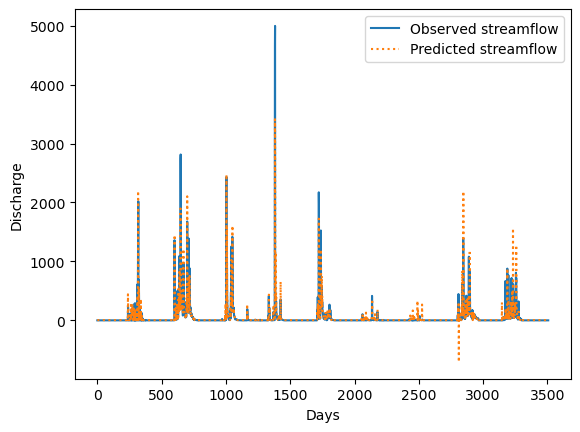

In [15]:
predicted = model.predict(x2)
sz = y2.size
plt.plot(range(sz), y2)
plt.plot(range(sz), predicted,linestyle = 'dotted')
plt.xlabel('Days')
plt.ylabel('Discharge')
plt.legend(["Observed streamflow", "Predicted streamflow"])
plt.show()